In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from hand_analysis_utils import *

In [3]:
from treys import Card
from treys import Evaluator
from treys import Deck

In [4]:
all_hands = get_all_donk_flips()

In [5]:
len(all_hands)

6942

In [6]:
all_flips = get_hands_as_df(all_hands)

In [7]:
def look_for_hand(cards_shown, user):
    try:
        return cards_shown[user]
    except:
        return pd.NA

In [8]:
all_flips = all_flips.drop(columns= ['double_board', 'n_cards_seen', 'cards_before_all_in',
                                     'is_all_in_runout', 'won_at_showdown'])

In [9]:
all_flips['player_1_hand'] = all_flips['cards_shown'].apply(lambda x: look_for_hand(x, 'you'))
all_flips['player_2_hand'] = all_flips['cards_shown'].apply(lambda x: look_for_hand(x, '-you'))

In [10]:
all_flips = all_flips.dropna().reset_index(drop=True)

In [11]:
all_flips['flop'] = all_flips['runout'].apply(lambda x: x[:9])
all_flips['turn'] = all_flips['runout'].apply(lambda x: x[:12])
all_flips['river'] = all_flips['runout']

In [12]:
def look_for_winner(winners, user):
    if len(winners) == 2:
        return .5
    elif user in winners:
        return 1
    return 0

In [13]:
all_flips['player_1_won'] = all_flips['pot_winners'].apply(lambda x: look_for_winner(x, 'you'))
all_flips['player_2_won'] = all_flips['pot_winners'].apply(lambda x: look_for_winner(x, '-you'))

In [14]:
all_flips = all_flips.drop(columns = ['pot_winners', 'pot_size','runout','cards_shown'])

In [15]:
from holdem_calc import *

In [16]:
def filter_card_val(val):
    if val == '10':
        return 'T'
    else:
        return val

In [39]:
suits = ['♥', '♦', '♣', '♠']
suit_to_char = {'♥': 'h', '♦': 'd', '♣': 'c', '♠': 's'}


def convert_hand_string_to_list(hand):
    output_hand = []
    last_suit_loc = -1
    for i in range(len(hand)):
        if hand[i] not in suits:
            pass
        else:
            output_hand.append(filter_card_val(hand[last_suit_loc+1:i].strip()) + str(suit_to_char[hand[i]]))
            last_suit_loc = i
            
    return output_hand

In [60]:
def remove_bad_flops(flop):
    if (len(flop) < 3) or (len(flop) > 3):
        return pd.NA
    return flop

In [63]:
all_flips['flop'] = all_flips['flop'].apply(lambda x: remove_bad_flops(x))

In [64]:
all_flips = all_flips.dropna().reset_index(drop=True)

In [53]:
sum(map(lambda x: len(x) < 3, all_flips['flop']))

106

In [17]:
for col in ['player_1_hand', 'player_2_hand', 'flop', 'turn', 'river']:
    all_flips[col] = all_flips[col].apply(lambda x: convert_hand_string_to_list(x))

In [49]:
def estimate_expectation_of_hand(hand1, hand2, flop = None):
    """ 0 if lose, 1 if win, .5 if chop - estimates expectation """
    print('-',end='')
    joint_hands = hand1 + hand2
    prob_chop, prob_win, prob_lose = calculate(flop, False, 1000, None, joint_hands, False)
    
    return prob_chop*.5 + prob_win

In [46]:
all_flips['player_1_preflop_equity'] = all_flips.apply(
    lambda row: estimate_expectation_of_hand(row['player_1_hand'], row['player_2_hand']), axis=1)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [66]:
all_flips['player_1_flop_equity'] = all_flips.apply(
    lambda row: estimate_expectation_of_hand(row['player_1_hand'], row['player_2_hand'], row['flop']), axis=1)

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [67]:
all_flips['player_1_turn_equity'] = all_flips.apply(
    lambda row: estimate_expectation_of_hand(row['player_1_hand'], row['player_2_hand'], row['turn']), axis=1)

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# flor all flop equity .9 - .95, what is realized equity

In [96]:
df = all_flips.loc[(all_flips['player_1_flop_equity'] > .55) &
                   (all_flips['player_1_flop_equity'] < .60)]

In [98]:
df['player_1_turn_equity'].std()

0.29772722396003676

In [100]:
all_flips.to_pickle('donk_flips.pkl')

In [17]:
all_flips = pd.read_pickle('donk_flips.pkl')

In [18]:
all_flips

,hand,player_1_hand,player_2_hand,flop,turn,river,player_1_won,player_2_won,player_1_preflop_equity,player_1_flop_equity,player_1_turn_equity
0,"[you (2000, SB),, -you (2100, BB) are in the h...","[2h, 5d]","[Ad, Ks]","[8s, Td, 2d]","[8s, Td, 2d, Qs]","[8s, Td, 2d, Qs, Jc]",0.0,1.0,0.3675,0.726263,0.772727
1,"[-you (2200, SB),, you (1900, BB) are in the h...","[8c, 6c]","[Ah, Ks]","[Qh, Kc, Jc]","[Qh, Kc, Jc, 7h]","[Qh, Kc, Jc, 7h, 8s]",0.0,1.0,0.4235,0.373737,0.204545
2,"[you (1800, SB),, -you (2300, BB) are in the h...","[3h, 8h]","[Qd, Ts]","[9d, Js, 5d]","[9d, Js, 5d, 6c]","[9d, Js, 5d, 6c, 4c]",0.0,1.0,0.3835,0.120202,0.159091
3,"[-you (2400, SB),, you (1700, BB) are in the h...","[Kh, Jh]","[7d, 2s]","[Th, Jd, 8s]","[Th, Jd, 8s, 3d]","[Th, Jd, 8s, 3d, 5s]",1.0,0.0,0.6905,0.843939,0.909091
4,"[you (1800, SB),, -you (2300, BB) are in the h...","[Ks, Ad]","[Jh, 6s]","[Js, 5h, 4s]","[Js, 5h, 4s, Ac]","[Js, 5h, 4s, Ac, 3h]",1.0,0.0,0.7020,0.264646,0.886364
...,...,...,...,...,...,...,...,...,...,...,...
6758,"[-you (500, SB),, you (3600, BB) are in the ha...","[Tc, 9s]","[7h, 4c]","[Kc, Ac, 3d]","[Kc, Ac, 3d, Js]","[Kc, Ac, 3d, Js, Qs]",1.0,0.0,0.6965,0.739899,0.829545
6759,"[you (700.5, SB),, -you (1299.5, BB) are in th...","[Qc, Kc]","[Ad, Qs]","[8c, 5c, 3d]","[8c, 5c, 3d, 8d]","[8c, 5c, 3d, 8d, 7d]",0.0,1.0,0.3120,0.460606,0.272727
6760,"[-you (1199.5, SB),, you (800.5, BB) are in th...","[Qs, 4h]","[Jc, Ad]","[7s, 8d, 9h]","[7s, 8d, 9h, Th]","[7s, 8d, 9h, Th, 5c]",0.0,1.0,0.3630,0.220202,0.068182
6761,"[you (700.5, SB),, -you (1299.5, BB) are in th...","[Qc, Kc]","[Ad, Qs]","[8c, 5c, 3d]","[8c, 5c, 3d, 8d]","[8c, 5c, 3d, 8d, 7d]",0.0,1.0,0.2765,0.460606,0.272727


In [23]:
def card_list_to_deuces(cards):
    return [Card.new(c) for c in cards]

In [25]:
evaluator = Evaluator()
all_flips['player_1_strength'] = all_flips.apply(
    lambda row: evaluator.evaluate(card_list_to_deuces(row['river']), card_list_to_deuces(row['player_1_hand'])), axis = 1)

In [27]:
all_flips['player_2_strength'] = all_flips.apply(
    lambda row: evaluator.evaluate(card_list_to_deuces(row['river']), card_list_to_deuces(row['player_2_hand'])), axis = 1)

In [28]:
all_flips

,hand,player_1_hand,player_2_hand,flop,turn,river,player_1_won,player_2_won,player_1_preflop_equity,player_1_flop_equity,player_1_turn_equity,player_1_strength,player_2_strength
0,"[you (2000, SB),, -you (2100, BB) are in the h...","[2h, 5d]","[Ad, Ks]","[8s, Td, 2d]","[8s, Td, 2d, Qs]","[8s, Td, 2d, Qs, Jc]",0.0,1.0,0.3675,0.726263,0.772727,6066,1600
1,"[-you (2200, SB),, you (1900, BB) are in the h...","[8c, 6c]","[Ah, Ks]","[Qh, Kc, Jc]","[Qh, Kc, Jc, 7h]","[Qh, Kc, Jc, 7h, 8s]",0.0,1.0,0.4235,0.373737,0.204545,4701,3546
2,"[you (1800, SB),, -you (2300, BB) are in the h...","[3h, 8h]","[Qd, Ts]","[9d, Js, 5d]","[9d, Js, 5d, 6c]","[9d, Js, 5d, 6c, 4c]",0.0,1.0,0.3835,0.120202,0.159091,7277,7009
3,"[-you (2400, SB),, you (1700, BB) are in the h...","[Kh, Jh]","[7d, 2s]","[Th, Jd, 8s]","[Th, Jd, 8s, 3d]","[Th, Jd, 8s, 3d, 5s]",1.0,0.0,0.6905,0.843939,0.909091,4051,7238
4,"[you (1800, SB),, -you (2300, BB) are in the h...","[Ks, Ad]","[Jh, 6s]","[Js, 5h, 4s]","[Js, 5h, 4s, Ac]","[Js, 5h, 4s, Ac, 3h]",1.0,0.0,0.7020,0.264646,0.886364,3341,4031
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6758,"[-you (500, SB),, you (3600, BB) are in the ha...","[Tc, 9s]","[7h, 4c]","[Kc, Ac, 3d]","[Kc, Ac, 3d, Js]","[Kc, Ac, 3d, Js, Qs]",1.0,0.0,0.6965,0.739899,0.829545,1600,6188
6759,"[you (700.5, SB),, -you (1299.5, BB) are in th...","[Qc, Kc]","[Ad, Qs]","[8c, 5c, 3d]","[8c, 5c, 3d, 8d]","[8c, 5c, 3d, 8d, 7d]",0.0,1.0,0.3120,0.460606,0.272727,4704,4659
6760,"[-you (1199.5, SB),, you (800.5, BB) are in th...","[Qs, 4h]","[Jc, Ad]","[7s, 8d, 9h]","[7s, 8d, 9h, Th]","[7s, 8d, 9h, Th, 5c]",0.0,1.0,0.3630,0.220202,0.068182,7091,1603
6761,"[you (700.5, SB),, -you (1299.5, BB) are in th...","[Qc, Kc]","[Ad, Qs]","[8c, 5c, 3d]","[8c, 5c, 3d, 8d]","[8c, 5c, 3d, 8d, 7d]",0.0,1.0,0.2765,0.460606,0.272727,4704,4659


In [29]:
def sample_random_hands(n_hands, n_players):
    hands = []
    for i in range(n_hands):
        d = Deck()
        player_1_cards = d.draw(2)
        player_2_cards = d.draw(2)
        runout = d.draw(5)
        hands.append([player_1_cards, player_2_cards, runout])
    
    return hands

In [30]:
random_sample = sample_random_hands(all_flips.shape[0], 2)

In [31]:
sampled_flips = pd.DataFrame(columns = ['player_1_cards', 'player_2_cards', 'runout'], data = random_sample)

In [33]:
sampled_flips['player_1_strength'] = sampled_flips.apply(
    lambda row: evaluator.evaluate(row['runout'], row['player_1_cards']), axis = 1)
sampled_flips['player_2_strength'] = sampled_flips.apply(
    lambda row: evaluator.evaluate(row['runout'], row['player_2_cards']), axis = 1)

In [42]:
np.std(sampled_flips['player_1_strength'])

12113075.5510215

<AxesSubplot:>

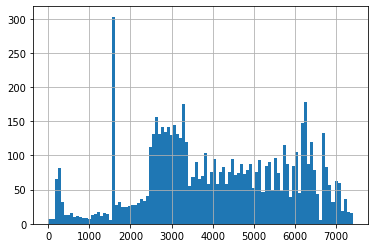

In [44]:
sampled_flips['player_1_strength'].hist(bins=100)

<AxesSubplot:>

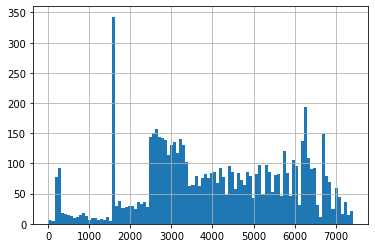

In [45]:
sampled_flips['player_2_strength'].hist(bins=100)

<AxesSubplot:>

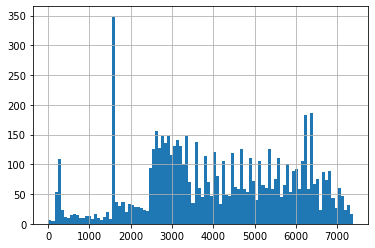

In [48]:
all_flips['player_1_strength'].hist(bins=100)

<AxesSubplot:>

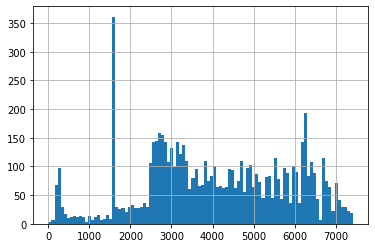

In [49]:
all_flips['player_2_strength'].hist(bins=100)

<AxesSubplot:>

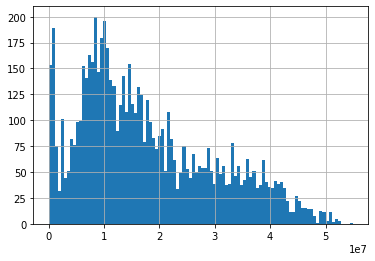

In [53]:
(sampled_flips['player_2_strength']*sampled_flips['player_1_strength']).hist(bins=100)

<AxesSubplot:>

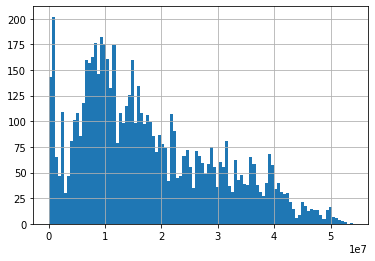

In [52]:
(all_flips['player_2_strength']*all_flips['player_1_strength']).hist(bins=100)

In [21]:
import re

In [40]:
def convert_from_nums_to_list(cards):
    return convert_hand_string_to_list(re.sub('[,\[\]\ ]', '', Card.print_pretty_cards(cards)))

In [41]:
convert_from_nums_to_list(sampled_flips.loc[0, 'player_1_cards'])

['Jh', '2d']

In [48]:
sampled_flips

,player_1_cards,player_2_cards,runout
0,"[33564957, 81922]","[16783383, 1053707]","[1082379, 557831, 2114829, 147715, 164099]"
1,"[16787479, 164099]","[529159, 33589533]","[147715, 268442665, 81922, 266757, 268446761]"
2,"[1065995, 81922]","[4199953, 33589533]","[135427, 16783383, 541447, 4212241, 134224677]"
3,"[8398611, 67144223]","[8406803, 4212241]","[164099, 134228773, 4228625, 268442665, 139523]"
4,"[33589533, 8394515]","[268442665, 8398611]","[268471337, 541447, 268446761, 67144223, 8406803]"
...,...,...,...
6758,"[529159, 2114829]","[541447, 16783383]","[557831, 139523, 67127839, 73730, 98306]"
6759,"[2131213, 8394515]","[4228625, 8423187]","[4212241, 295429, 268446761, 268442665, 541447]"
6760,"[8394515, 1057803]","[134224677, 2114829]","[295429, 8423187, 268446761, 4228625, 67115551]"
6761,"[147715, 1057803]","[279045, 69634]","[67115551, 4212241, 2102541, 268454953, 16812055]"


In [51]:
for col in list(sampled_flips.columns):
    sampled_flips[col] = sampled_flips[col].apply(lambda x: convert_from_nums_to_list(x))

In [53]:
sampled_flips['turn'] = sampled_flips['runout'].apply(lambda x: x[:4])

In [54]:
sampled_flips['flop'] = sampled_flips['runout'].apply(lambda x: x[:3])

In [55]:
sampled_flips

,player_1_cards,player_2_cards,runout,turn,flop
0,"[Jh, 2d]","[Ts, 6s]","[6c, 5c, 7d, 3d, 3c]","[6c, 5c, 7d, 3d]","[6c, 5c, 7d]"
1,"[Th, 3c]","[5s, Jc]","[3d, As, 2d, 4s, Ah]","[3d, As, 2d, 4s]","[3d, As, 2d]"
2,"[6d, 2d]","[8s, Jc]","[3s, Ts, 5d, 8d, Ks]","[3s, Ts, 5d, 8d]","[3s, Ts, 5d]"
3,"[9h, Qc]","[9d, 8d]","[3c, Kh, 8c, As, 3h]","[3c, Kh, 8c, As]","[3c, Kh, 8c]"
4,"[Jc, 9s]","[As, 9h]","[Ac, 5d, Ah, Qc, 9d]","[Ac, 5d, Ah, Qc]","[Ac, 5d, Ah]"
...,...,...,...,...,...
6758,"[5s, 7d]","[5d, Ts]","[5c, 3h, Qd, 2h, 2c]","[5c, 3h, Qd, 2h]","[5c, 3h, Qd]"
6759,"[7c, 9s]","[8c, 9c]","[8d, 4c, Ah, As, 5d]","[8d, 4c, Ah, As]","[8d, 4c, Ah]"
6760,"[9s, 6h]","[Ks, 7d]","[4c, 9c, Ah, 8c, Qs]","[4c, 9c, Ah, 8c]","[4c, 9c, Ah]"
6761,"[3d, 6h]","[4d, 2s]","[Qs, 8d, 7s, Ad, Tc]","[Qs, 8d, 7s, Ad]","[Qs, 8d, 7s]"
